In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.set_printoptions(threshold=np.inf)

In [8]:
# load predictions for train and val data
predictions = pickle.load(open('predictions.pkl', 'rb'))
train_predictions = predictions['train_preds']
val_predictions = predictions['val_preds']
train_truth = predictions['train_truths']
val_truth = predictions['val_truths']
# predictions are a list of numpy arrays. Each list element corresponds to a batch of data (32 samples)
# to get the keys you will need to 
train_predictions[0].shape, val_predictions[0].shape, train_truth[0].shape, val_truth[0].shape

((8431,), (8655,), (8431,), (8655,))

In [9]:
# get the first 70 predictions and ground truths
train_preds_example = train_predictions[0][:70]
train_truths_example = train_truth[0][:70]

In [13]:
train_preds_example

array([ 0.02958479,  0.08370785,  0.01636838,  0.04222833,  0.04279348,
        0.04973909,  0.0413677 ,  0.0841195 ,  0.06768306,  0.06323309,
        0.00437282,  0.03157192, -0.00672486, -0.03066109, -0.03909455,
       -0.01043311, -0.02762523,  0.0115913 ,  0.05388777, -0.00086139,
        0.0537812 ,  0.00316806,  0.03521667,  0.05680076,  0.02476675,
        0.00938771,  0.00137079,  0.06251688,  0.08409245, -0.00026081,
       -0.00669295,  0.07621226,  0.06011541,  0.07182571,  0.04237185,
        0.02510265,  0.04275195,  0.05202341,  0.04749646,  0.01178076,
        0.08995403,  0.02227176,  0.0150983 ,  0.1469313 ,  0.03384061,
        0.05081272,  0.11198318,  0.05897327,  0.08989365,  0.01771264,
        0.05976608,  0.07886705,  0.06504547,  0.06085218,  0.0309979 ,
        0.06820165,  0.11070079,  0.08507058,  0.06308959,  0.14065818,
        0.06427201,  0.01649863,  0.05035542,  0.07958726,  0.05055346,
        0.03276778,  0.07270305,  0.00932634, -0.0260089 ,  0.14

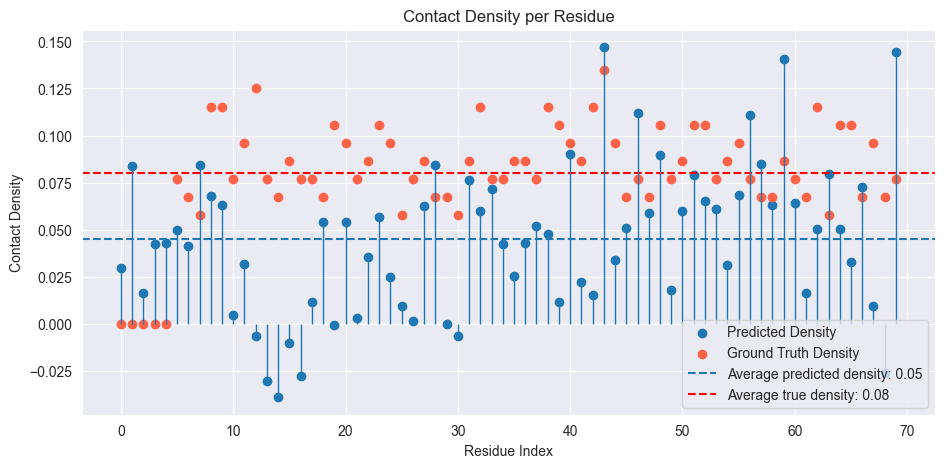

In [16]:
# plot the first 70 predictions and ground truths
train_preds_example_mean = np.mean(train_preds_example)
train_truths_example_mean = np.mean(train_truths_example)
plt.figure(figsize=(11, 5))
plt.scatter(range(len(train_preds_example)), train_preds_example, label="Predicted Density")
plt.scatter(range(len(train_truths_example)), train_truths_example, c="tomato", label="Ground Truth Density")
plt.axhline(y=train_preds_example_mean, linestyle='--', label=f"Average predicted density: {train_preds_example_mean:.2f}")
plt.axhline(y=train_truths_example_mean, color='r', linestyle='--', label=f"Average true density: {train_truths_example_mean:.2f}")
plt.vlines(x=range(len(train_preds_example)), linestyle='-', linewidth=1, ymin=0, ymax=train_preds_example)
plt.xlabel("Residue Index")
plt.ylabel("Contact Density")
plt.title("Contact Density per Residue")
plt.legend()
plt.show()